In [82]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

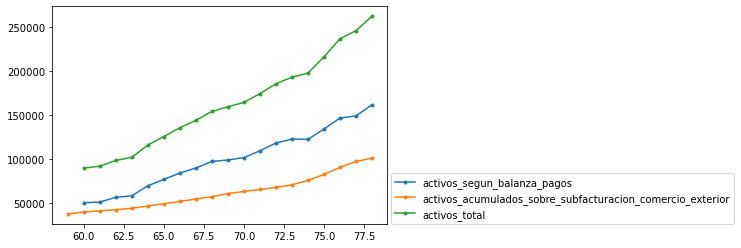

In [17]:
# Activos externos en millones de dólares
df = pd.read_csv('./../datos/336.1.csv').tail(20)

# Plata de los argentinos en el exterior. La posicion de inversion de Argentina en el exterior llega a $400 mil millones de USD, 
# https://www.ambito.com/economia/inversion/los-argentinos-guardan-mas-us250000-millones-fuera-del-sistema-financiero-local-n5180953



### Los activos externos se multiplican a lo largo del tiempo
axs = df.plot(marker = '.')
axs.legend(loc = (1.01, 0))
plt.show()

## Evolucion de la Balanza de pagos Impo / Expo de bienes

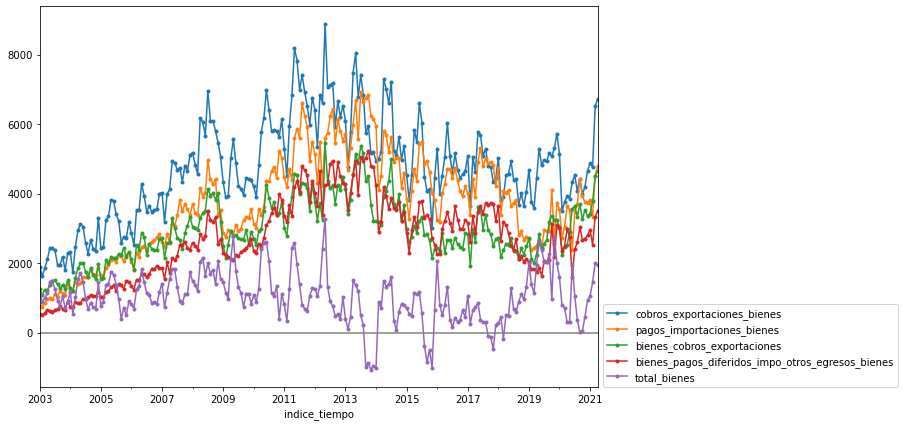

In [41]:
# Cobros y pagos por bienes por modalidad de pago. Valores mensuales. Millones de USD
df = pd.read_csv('./../datos/cobros-pagos-bienes-modalidad.csv')
df.index = pd.to_datetime(df.indice_tiempo)
df = df.drop('indice_tiempo', axis = 1)

tots = df.sum(0).sort_values(ascending = False)
# tots.cumsum()/tots.sum() # Las primeras 5 son el 85%

df = df[tots.head(5).index]
axs = df.plot(marker = '.', figsize = (10, 7))
axs.legend(loc = (1.01, 0))
axs.axhline(0, c = '.5')
plt.show()

## Cobros por exportaciones de agroindustria

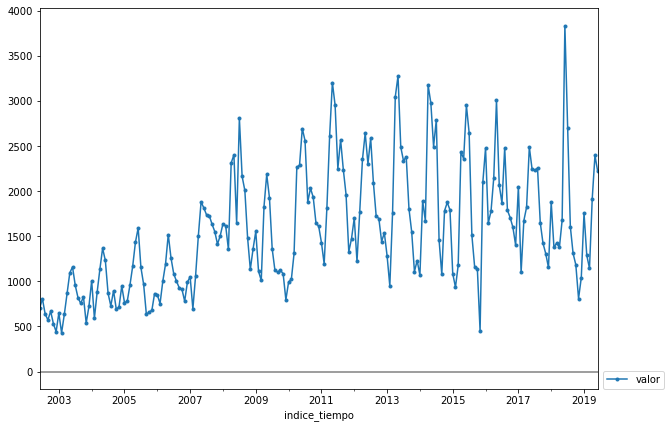

In [43]:
# Agroindustria: liquidación de divisas en concepto de oleaginosas y cereales (series)
df = pd.read_csv('./../datos/agroindustria-liquid-divisas-series.csv')
df.index = pd.to_datetime(df.indice_tiempo)
df = df.drop('indice_tiempo', axis = 1)

axs = df.plot(marker = '.', figsize = (10, 7))
axs.legend(loc = (1.01, 0))
axs.axhline(0, c = '.5')
plt.show()

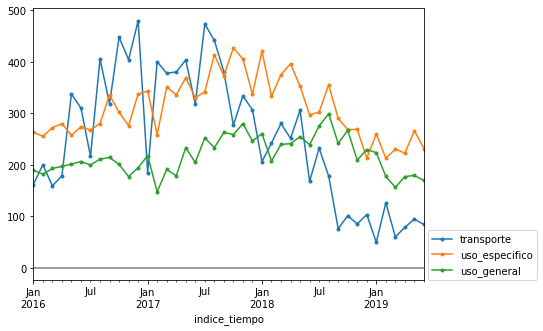

In [45]:
# Industria: importaciones de bienes de capital productivo (series)
df = pd.read_csv('./../datos/bsk-prod-series.csv')
df.index = pd.to_datetime(df.indice_tiempo)
df = df.drop('indice_tiempo', axis = 1)

axs = df.plot(marker = '.', figsize = (7, 5))
axs.legend(loc = (1.01, 0))
axs.axhline(0, c = '.5')
plt.show()

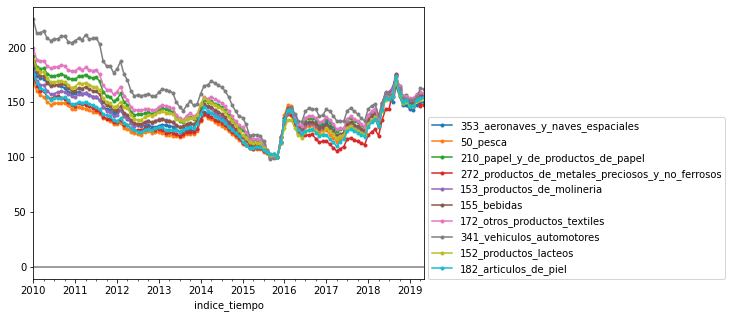

In [49]:
# Índice de Tipo de Cambio Real Sectorial Efectivo (series)
df = pd.read_csv('./../datos/tcrmse-series.csv')
df.index = pd.to_datetime(df.indice_tiempo)
df = df.drop('indice_tiempo', axis = 1)

axs = df.sample(10, axis = 1).plot(marker = '.', figsize = (7, 5))
axs.legend(loc = (1.01, 0))
axs.axhline(0, c = '.5')
plt.show()


## Principales exportaciones

In [80]:
# Comercio exterior: exportaciones por partida (panel)
df = pd.read_csv('./../datos/expo-partida-panel.csv')
df['indice_tiempo'] = pd.to_datetime(df.indice_tiempo)
df = df.set_index(['indice_tiempo', 'partida']).unstack()

tots = df.sum(0).sort_values(ascending = False)
pd.DataFrame(tots.cumsum()/tots.sum()).head(30) # Los 20 productos que explican dos tercios de las exportaciones


0
      partida                                                     
valor 2304 - Tortas y demas residuos sslidos de la ex...  0.150438
      1005 - Maiz.                                        0.220051
      8704 - Vehiculos automoviles para el transporte...  0.281123
      1507 - Aceite de soja (soya) y sus fracciones, ...  0.329600
      1001 - Trigo y morcajo (tranquillon).               0.370395
      0000 - Resto                                        0.406742
      7108 - Oro (incluido el oro platinado) en bruto...  0.440208
      8703 - Coches de turismo y demas vehiculos auto...  0.472039
      1201 - Habas (porotos, frijoles, frijoles)* de ...  0.495803
      0306 - Crustaceos, incluso pelados, vivos, fres...  0.517478
      8708 - Partes y accesorios de vehiculos automov...  0.537029
      0202 - Carne de animales de la especie bovina, ...  0.556170
      2709 - Aceites crudos de petrsleo o de mineral ...  0.573640
      9998 - Operaciones especiales                       0.589560
      2710 - Aceites de petrsleo o de mineral bitumin...  0.604985
      3826 -  BIODIESEL Y SUS MEZCLAS, SIN ACEITES DE...  0.619347
      2204 - Vino de uvas frescas, incluso encabezado...  0.632788
      0201 - Carne de animales de la especie bovina, ...  0.644770
      1003 - Cebada.                                      0.654126
      1512 - Aceites de girasol, cartamo o algodon, y...  0.663422
      2711 - Gas de petroleo y demas hidrocarburos ga...  0.672644
      4104 - Cueros y pieles de bovino o de equino, d...  0.681288
      3004 - Medicamentos (excepto los productos de l...  0.689328
      2008 - Frutas u otros frutos y demas partes com...  0.697310
      0402 - Leche y nata (crema), concentradas o con...  0.704698
      7304 - Tubos y perfiles huecos, sin soldadura (...  0.711911
      0713 - Hortalizas (incluso silvestres) de vaina...  0.719021
      3901 - Polimeros de etileno en formas primarias.    0.725893
      2009 - Jugos de frutas u otros frutos (incluido...  0.732681
      0808 - Manzanas, peras y membrillos, frescos.       0.739048

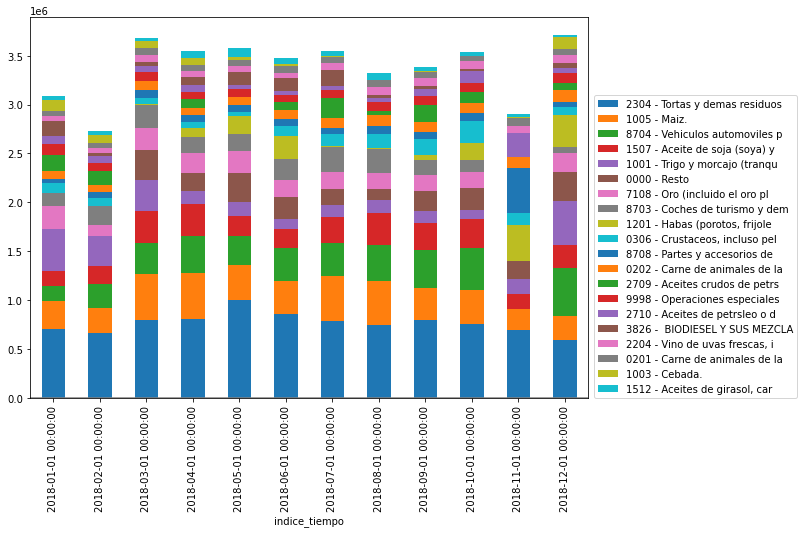

In [81]:

df = df[tots.head(20).index]['valor']
df.columns = [col[:30] for col in df.columns]
axs = df.plot(kind = 'bar', stacked = True, figsize = (10, 7))

axs.legend(loc = (1.01, 0))
axs.axhline(0, c = '.5')
plt.show()

## Principales Importaciones

In [85]:
# Comercio exterior: importaciones por partida (panel)
df = pd.read_csv('./../datos/impo-partida-panel.csv')
df['indice_tiempo'] = pd.to_datetime(df.indice_tiempo)
df = df.set_index(['indice_tiempo', 'partida']).unstack()

tots = df.sum(0).sort_values(ascending = False)
pd.DataFrame(tots.cumsum()/tots.sum()).head(30) # Los 20 productos que explican dos tercios de las exportaciones


0
      partida                                                     
valor 8703 - Coches de turismo y demas vehiculos auto...  0.076480
      8708 - Partes y accesorios de vehiculos automov...  0.117251
      2710 - Aceites de petrsleo o de mineral bitumin...  0.157907
      2711 - Gas de petroleo y demas hidrocarburos ga...  0.196504
      1201 - Habas (porotos, frijoles, frijoles)* de ...  0.230804
      8517 - Aparatos electricos de telefonia o teleg...  0.261145
      8704 - Vehiculos automoviles para el transporte...  0.281458
      3004 - Medicamentos (excepto los productos de l...  0.299625
      0000 - Resto                                        0.315162
      3002 - Sangre humana; sangre animal preparada p...  0.328070
      8471 - Maquinas automaticas para tratamiento o ...  0.338806
      8503 - Partes identificables como destinadas, e...  0.348515
      8529 - Partes identificables como destinadas, e...  0.357903
      8408 - Motores de embolo (piston) de encendido ...  0.367042
      3808 - Insecticidas, raticidas, fungicidas, her...  0.375820
      9998 - Operaciones especiales                       0.384183
      8701 - Tractores (excepto las carretillas tract...  0.392441
      3105 - Abonos minerales o quimicos, con dos o t...  0.400378
      8544 - Hilos, cables (incluidos los coaxiales) ...  0.407866
      8711 - Motocicletas y triciclos a motor (inclui...  0.415274
      2601 - Minerales de hierro y sus concentrados, ...  0.422443
      8414 - Bombas de aire o de vacio, compresores d...  0.429451
      8413 - Bombas para liquidos, incluso con dispos...  0.436216
      3901 - Polimeros de etileno en formas primarias.    0.442749
      2818 - Corindon artificial, aunque no sea quimi...  0.449242
      4011 - Neumaticos (llantas neumaticas) nuevos d...  0.455246
      8421 - Centrifugadoras, incluidas las secadoras...  0.461198
      8481 - Articulos de griferia y organos similare...  0.467136
      8429 - Topadoras frontales ("bulldozers"), topa...  0.473024
      8409 - Partes identificables como destinadas, e...  0.478669

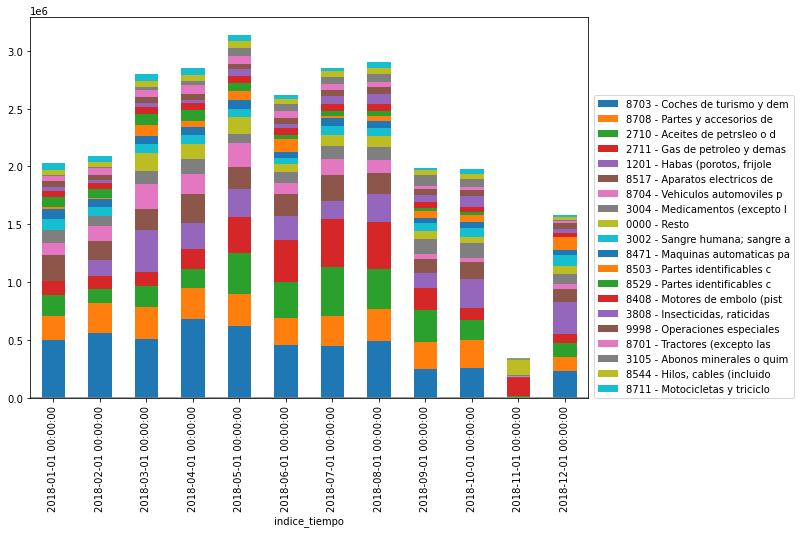

In [86]:

df = df[tots.head(20).index]['valor']
df.columns = [col[:30] for col in df.columns]
axs = df.plot(kind = 'bar', stacked = True, figsize = (10, 7))

axs.legend(loc = (1.01, 0))
axs.axhline(0, c = '.5')
plt.show()